In [1]:
import pandas as pd
from pathlib import Path

DATA_FILE = "student_performance_cleaned.csv"  # <-- change this to your file
df = pd.read_csv(DATA_FILE)
df.head(3), df.shape, df.columns.tolist()

(   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
 0       0.511628        0.60                   0.5                  0.0   
 1       0.418605        0.10                   0.5                  1.0   
 2       0.534884        0.95                   1.0                  1.0   
 
    Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
 0                         0.0     0.500000             0.46               0.5   
 1                         0.0     0.666667             0.18               0.5   
 2                         1.0     0.500000             0.82               1.0   
 
    Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
 0              1.0               0.00            0.5              1.0   
 1              1.0               0.25            1.0              1.0   
 2              1.0               0.25            1.0              1.0   
 
    School_Type  Peer_Influence  Physical_Activity  Learning_Disab

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1 = high achiever (>=70), 0 = otherwise
df["Performance"] = (df["Exam_Score"] >= 70).astype(int)

X = df.drop(columns=["Exam_Score", "Performance"])
y = df["Performance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.mean()

((5285, 19), (1322, 19), 0.24597918637653737)

In [3]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred = logit.predict(X_test)
y_prob = logit.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc*100:.2f}%")
print(f"ROC-AUC:  {auc*100:.2f}%")

rep = classification_report(y_test, y_pred, output_dict=True)

def pct(x): 
    return f"{100*x:.2f}%"

print("\nClass 1 (High achiever):")
print("  Precision:", pct(rep['1']['precision']))
print("  Recall:   ", pct(rep['1']['recall']))
print("  F1-score: ", pct(rep['1']['f1-score']))

print("\nClass 0 (Others):")
print("  Precision:", pct(rep['0']['precision']))
print("  Recall:   ", pct(rep['0']['recall']))
print("  F1-score: ", pct(rep['0']['f1-score']))

print("\nMacro Avg F1:", pct(rep['macro avg']['f1-score']))
print("Weighted Avg F1:", pct(rep['weighted avg']['f1-score']))

Accuracy: 91.38%
ROC-AUC:  95.50%

Class 1 (High achiever):
  Precision: 85.28%
  Recall:    78.46%
  F1-score:  81.73%

Class 0 (Others):
  Precision: 93.16%
  Recall:    95.59%
  F1-score:  94.36%

Macro Avg F1: 88.04%
Weighted Avg F1: 91.25%


In [5]:
import numpy as np
coef = pd.DataFrame({
    "feature": X.columns,
    "coef": logit.coef_[0],
})
coef["odds_ratio"] = np.exp(coef["coef"])  # per 1-unit increase
# sort by absolute impact
coef = coef.reindex(coef["coef"].abs().sort_values(ascending=False).index)

# top positives increase odds; negatives decrease odds
coef.head(10)

,feature,coef,odds_ratio
0,Hours_Studied,12.576756,289744.837102
1,Attendance,8.470785,4773.258911
9,Tutoring_Sessions,3.913858,50.091825
6,Previous_Scores,2.686124,14.674679
13,Peer_Influence,1.279196,3.593749
17,Distance_from_Home,1.180050,3.254536
8,Internet_Access,1.173947,3.234735
14,Physical_Activity,1.089197,2.971888
3,Access_to_Resources,-1.037921,0.354190
2,Parental_Involvement,-0.859780,0.423255


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_dt  = dt.predict(X_test)
y_prob_dt  = dt.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_prob_dt)

def pct(x): return f"{100*x:.2f}%"

rep = classification_report(y_test, y_pred_dt, output_dict=True)

print(f"Accuracy: {pct(acc)}")
print(f"ROC-AUC:  {pct(auc)}")

print("\nClass 1 (High achiever):")
print("  Precision:", pct(rep['1']['precision']))
print("  Recall:   ", pct(rep['1']['recall']))
print("  F1-score: ", pct(rep['1']['f1-score']))

print("\nClass 0 (Others):")
print("  Precision:", pct(rep['0']['precision']))
print("  Recall:   ", pct(rep['0']['recall']))
print("  F1-score: ", pct(rep['0']['f1-score']))

print("\nMacro Avg F1:", pct(rep['macro avg']['f1-score']))
print("Weighted Avg F1:", pct(rep['weighted avg']['f1-score']))

Accuracy: 84.80%
ROC-AUC:  79.24%

Class 1 (High achiever):
  Precision: 69.38%
  Recall:    68.31%
  F1-score:  68.84%

Class 0 (Others):
  Precision: 89.72%
  Recall:    90.17%
  F1-score:  89.94%

Macro Avg F1: 79.39%
Weighted Avg F1: 84.76%


In [8]:
import pandas as pd
imp = pd.DataFrame({
    "feature": X.columns,
    "importance": dt.feature_importances_
}).sort_values("importance", ascending=False)
imp.head(12)

,feature,importance
1,Attendance,0.341314
0,Hours_Studied,0.217471
6,Previous_Scores,0.111283
9,Tutoring_Sessions,0.054107
3,Access_to_Resources,0.041231
2,Parental_Involvement,0.030148
5,Sleep_Hours,0.028128
10,Family_Income,0.024872
14,Physical_Activity,0.022638
16,Parental_Education_Level,0.020255


In [9]:
from sklearn.model_selection import GridSearchCV

grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=grid,
    scoring="f1_weighted",   # good for class balance
    cv=5,
    n_jobs=-1
)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
dt_grid.best_params_, dt_grid.best_score_

({'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10},
 0.865504784232003)

In [10]:
y_pred_best = dt_best.predict(X_test)
y_prob_best = dt_best.predict_proba(X_test)[:, 1]

acc_b = accuracy_score(y_test, y_pred_best)
auc_b = roc_auc_score(y_test, y_prob_best)
rep_b = classification_report(y_test, y_pred_best, output_dict=True)

print(f"[TUNED] Accuracy: {pct(acc_b)}")
print(f"[TUNED] ROC-AUC:  {pct(auc_b)}")
print("\n[TUNED] Class 1 (High achiever):")
print("  Precision:", pct(rep_b['1']['precision']))
print("  Recall:   ", pct(rep_b['1']['recall']))
print("  F1-score: ", pct(rep_b['1']['f1-score']))
print("\n[TUNED] Weighted Avg F1:", pct(rep_b['weighted avg']['f1-score']))

[TUNED] Accuracy: 86.46%
[TUNED] ROC-AUC:  89.14%

[TUNED] Class 1 (High achiever):
  Precision: 73.86%
  Recall:    69.54%
  F1-score:  71.63%

[TUNED] Weighted Avg F1: 86.32%


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
rf.fit(X_train, y_train)
rf.oob_score_  # out-of-bag estimate (rough cross-val on train)

0.9131504257332071

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_rf  = rf.predict(X_test)
y_prob_rf  = rf.predict_proba(X_test)[:, 1]

def pct(x): return f"{100*x:.2f}%"

acc = accuracy_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_prob_rf)
rep = classification_report(y_test, y_pred_rf, output_dict=True)

print(f"Accuracy: {pct(acc)}")
print(f"ROC-AUC:  {pct(auc)}")
print(f"OOB Score (train): {pct(rf.oob_score_)}")

print("\nClass 1 (High achiever):")
print("  Precision:", pct(rep['1']['precision']))
print("  Recall:   ", pct(rep['1']['recall']))
print("  F1-score: ", pct(rep['1']['f1-score']))

print("\nClass 0 (Others):")
print("  Precision:", pct(rep['0']['precision']))
print("  Recall:   ", pct(rep['0']['recall']))
print("  F1-score: ", pct(rep['0']['f1-score']))

print("\nMacro Avg F1:", pct(rep['macro avg']['f1-score']))
print("Weighted Avg F1:", pct(rep['weighted avg']['f1-score']))

Accuracy: 90.92%
ROC-AUC:  96.48%
OOB Score (train): 91.32%

Class 1 (High achiever):
  Precision: 91.16%
  Recall:    69.85%
  F1-score:  79.09%

Class 0 (Others):
  Precision: 90.87%
  Recall:    97.79%
  F1-score:  94.20%

Macro Avg F1: 86.65%
Weighted Avg F1: 90.49%


In [13]:
import pandas as pd

rf_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)
rf_imp.head(12)

,feature,importance
1,Attendance,0.332786
0,Hours_Studied,0.212531
6,Previous_Scores,0.090753
9,Tutoring_Sessions,0.044574
5,Sleep_Hours,0.035319
3,Access_to_Resources,0.034616
14,Physical_Activity,0.031383
2,Parental_Involvement,0.028672
13,Peer_Influence,0.025285
16,Parental_Education_Level,0.024484


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", 0.5, 0.7, None],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=40,            # bump to 80 if you have time
    scoring="f1_weighted",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_search.best_params_, rf_search.best_score_

({'bootstrap': False,
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 9,
  'n_estimators': 327},
 0.9065253027414306)

In [15]:
y_pred_best = rf_best.predict(X_test)
y_prob_best = rf_best.predict_proba(X_test)[:, 1]

acc_b = accuracy_score(y_test, y_pred_best)
auc_b = roc_auc_score(y_test, y_prob_best)
rep_b = classification_report(y_test, y_pred_best, output_dict=True)

print(f"[TUNED] Accuracy: {pct(acc_b)}")
print(f"[TUNED] ROC-AUC:  {pct(auc_b)}")

print("\n[TUNED] Class 1 (High achiever):")
print("  Precision:", pct(rep_b['1']['precision']))
print("  Recall:   ", pct(rep_b['1']['recall']))
print("  F1-score: ", pct(rep_b['1']['f1-score']))

print("\n[TUNED] Weighted Avg F1:", pct(rep_b['weighted avg']['f1-score']))

[TUNED] Accuracy: 90.47%
[TUNED] ROC-AUC:  96.22%

[TUNED] Class 1 (High achiever):
  Precision: 90.61%
  Recall:    68.31%
  F1-score:  77.89%

[TUNED] Weighted Avg F1: 89.98%


In [16]:
rf_imp_best = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_best.feature_importances_
}).sort_values("importance", ascending=False)
rf_imp_best.head(12)

,feature,importance
1,Attendance,0.402246
0,Hours_Studied,0.245039
6,Previous_Scores,0.080905
9,Tutoring_Sessions,0.038481
3,Access_to_Resources,0.035233
2,Parental_Involvement,0.026221
5,Sleep_Hours,0.021915
14,Physical_Activity,0.021068
13,Peer_Influence,0.018416
16,Parental_Education_Level,0.017396


In [17]:
import joblib
from pathlib import Path

# create folder for saved models
Path("models").mkdir(exist_ok=True)

In [18]:
# logistic regression
joblib.dump(logit, "models/logistic_regression_student.joblib")

# decision tree (use tuned one if you did tuning)
joblib.dump(dt_best, "models/decision_tree_student.joblib")

# random forest (use tuned one if you did tuning)
joblib.dump(rf_best, "models/random_forest_student.joblib")

['models/random_forest_student.joblib']

In [19]:
# choose tuned models if you ran tuning; else fall back to baseline
model_dt = dt_best if "dt_best" in globals() else dt
model_rf = rf_best if "rf_best" in globals() else rf

models = {
    "Logistic Regression": logit,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
}
list(models.keys())

['Logistic Regression', 'Decision Tree', 'Random Forest']

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score

rows = []
for name, m in models.items():
    # quick 5-fold CV accuracy on TRAIN only
    cv_acc = cross_val_score(m, X_train, y_train, cv=5, scoring="accuracy").mean()

    # test metrics
    y_pred = m.predict(X_test)
    y_prob = m.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    ll  = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    rows.append([name, cv_acc, acc, f1m, ll, auc])

perf = pd.DataFrame(rows, columns=["Model", "CV Accuracy", "Accuracy", "Macro F1", "Log-loss", "AUC"]).set_index("Model")
perf

,CV Accuracy,Accuracy,Macro F1,Log-loss,AUC
Model,,,,,
Logistic Regression,0.913529,0.913767,0.880436,0.237063,0.955007
Decision Tree,0.867360,0.864599,0.813701,0.820170,0.891393
Random Forest,0.910123,0.904690,0.859098,0.252508,0.962225


In [21]:
def pct(s): 
    return (s*100).map(lambda x: f"{x:.2f}%")

display_tbl = perf.copy()
for col in ["CV Accuracy", "Accuracy", "Macro F1", "AUC"]:
    display_tbl[col] = pct(display_tbl[col])

# keep log-loss as is (lower is better)
display_tbl

,CV Accuracy,Accuracy,Macro F1,Log-loss,AUC
Model,,,,,
Logistic Regression,91.35%,91.38%,88.04%,0.237063,95.50%
Decision Tree,86.74%,86.46%,81.37%,0.820170,89.14%
Random Forest,91.01%,90.47%,85.91%,0.252508,96.22%


In [22]:
# raw numeric CSV (good for analysis)
perf.to_csv("model_performance_summary.csv", index=True)

# pretty version (strings with %)
display_tbl.to_csv("model_performance_summary_pretty.csv", index=True)

print("Saved: model_performance_summary.csv and model_performance_summary_pretty.csv")

Saved: model_performance_summary.csv and model_performance_summary_pretty.csv


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title, normalize=False, save_as=None):
    cm = confusion_matrix(y_true, y_pred, normalize="true" if normalize else None)
    labels = ["Low/Other (0)", "High (1)"]
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    plt.figure(figsize=(4.2, 3.8))
    fmt = ".2%" if normalize else "d"
    sns.heatmap(df_cm, annot=True, fmt=fmt, cbar=False, linewidths=.5)
    plt.title(title + (" — % " if normalize else " — counts"))
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    if save_as:
        plt.savefig(save_as, dpi=200)
    plt.show()

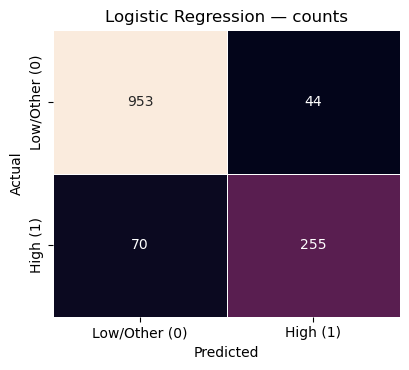

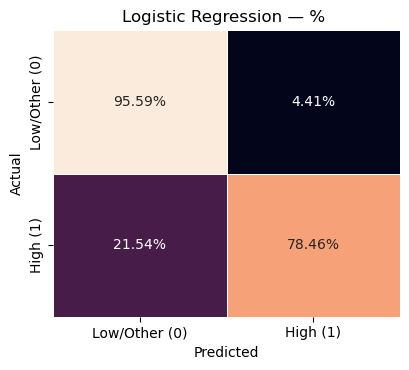

In [24]:
y_pred_log = logit.predict(X_test)

plot_cm(y_test, y_pred_log, "Logistic Regression", normalize=False, save_as="cm_logit_counts.png")
plot_cm(y_test, y_pred_log, "Logistic Regression", normalize=True,  save_as="cm_logit_pct.png")

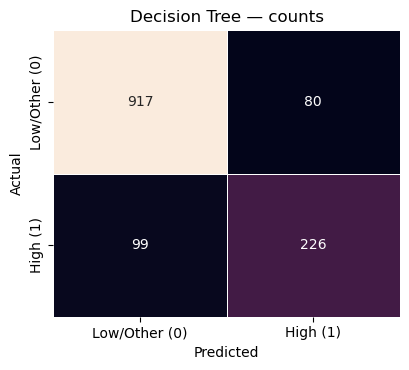

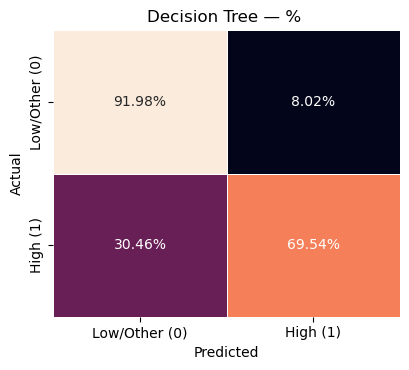

In [25]:
model_dt = dt_best if "dt_best" in globals() else dt
y_pred_dt = model_dt.predict(X_test)

plot_cm(y_test, y_pred_dt, "Decision Tree", normalize=False, save_as="cm_tree_counts.png")
plot_cm(y_test, y_pred_dt, "Decision Tree", normalize=True,  save_as="cm_tree_pct.png")

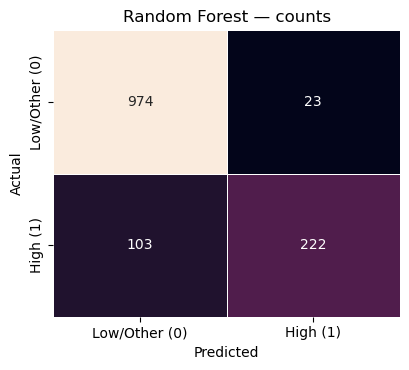

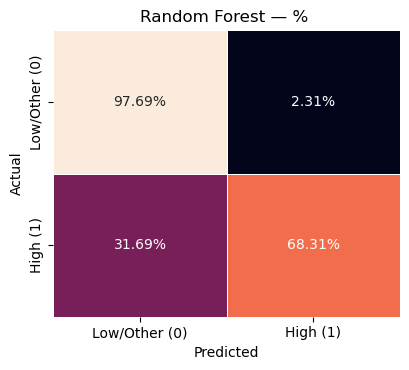

In [26]:
model_rf = rf_best if "rf_best" in globals() else rf
y_pred_rf = model_rf.predict(X_test)

plot_cm(y_test, y_pred_rf, "Random Forest", normalize=False, save_as="cm_rf_counts.png")
plot_cm(y_test, y_pred_rf, "Random Forest", normalize=True,  save_as="cm_rf_pct.png")

In [27]:
from collections import OrderedDict

def cm_counts(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return OrderedDict(TN=tn, FP=fp, FN=fn, TP=tp)

rows = []
rows.append(["Logistic Regression", *cm_counts(y_test, y_pred_log).values()])
rows.append(["Decision Tree",      *cm_counts(y_test, y_pred_dt).values()])
rows.append(["Random Forest",      *cm_counts(y_test, y_pred_rf).values()])

cm_table = pd.DataFrame(rows, columns=["Model","TN","FP","FN","TP"]).set_index("Model")
cm_table

,TN,FP,FN,TP
Model,,,,
Logistic Regression,953,44,70,255
Decision Tree,917,80,99,226
Random Forest,974,23,103,222
